#  CONTENTS LIST
## 1. Importing libraries and data frames
## 2. Are there certain types of products that are more popular than others?
## 3. Are there differences in ordering habits based on a customer’s loyalty status?
## 4. Are there differences in ordering habits based on a customer’s region?
## 5. Is there a connection between age and family status in terms of ordering habits?
## 6. What different classifications does the demographic information suggest?
## 7. What differences can you find in ordering habits of different customer profiles?
## 8. Compare Profiles with Regions and States 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path = r'C:\Users\Christian\Desktop\Mein Ordner\CF\Data Immersion\Achievement4\Instacart Basket Analysis'

In [3]:
#Import orders_products_customerl.pkl as df
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_profiles.pkl'))

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,dependants,family_status,income,Region,activity_flag,age-group,income-group,fam_status
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants
6,550135,1,prior,7,1,9,20.0,196,1,1,...,31,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,31,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,31,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants


In [5]:
#Import departments_wrangled.csv as df
df_2 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
df_2.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
#rename column
df_2 = df_2.rename(columns={'Unnamed: 0': 'department_id'})

In [9]:
df_2.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
#Change department_id data type to a string
df_2['department_id']=df_2['department_id'].astype('str')

In [11]:
df['department_id']=df['department_id'].astype('str')

In [12]:
#perform full outer merge
df_merge = df.merge(df_2, on=['department_id'], how='outer')

In [13]:
df_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,dependants,family_status,income,Region,activity_flag,age-group,income-group,fam_status,department
0,431534,1,prior,5,4,15,28.0,196,1,1,...,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants,beverages
1,3367565,1,prior,6,2,7,19.0,196,1,1,...,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants,beverages
2,550135,1,prior,7,1,9,20.0,196,1,1,...,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants,beverages
3,3108588,1,prior,8,1,14,14.0,196,2,1,...,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants,beverages
4,2295261,1,prior,9,1,16,0.0,196,4,1,...,2/17/2019,3,married,40423,South,high-activity customer,young adult,low income,married with dependants,beverages


## Are there certain types of products that are more popular than others?

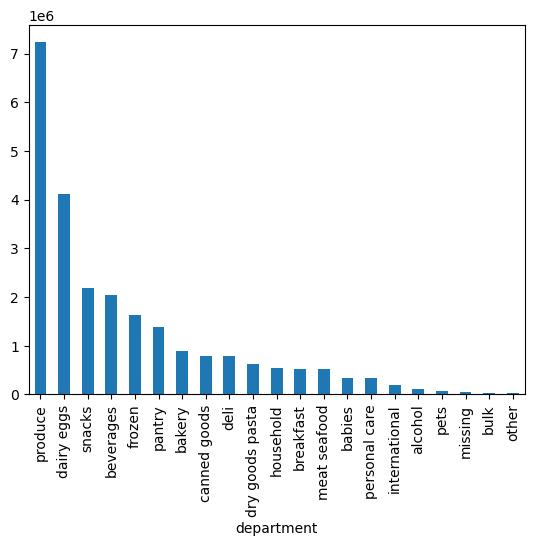

In [14]:
# create bar chart
bar_dep =  df_merge['department'].value_counts().plot.bar()

In [15]:
# save bar chart
bar_dep.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dep.png'))

## Are there differences in ordering habits based on a customer’s loyalty status?

In [16]:
#Create a crosstab
crosstab = pd.crosstab(df_merge['loyalty_flag'], df_merge['order_dow'], dropna=False)

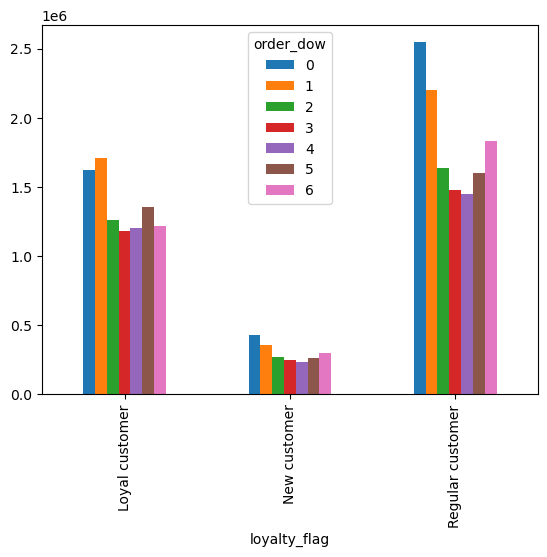

In [17]:
# create bar chart
bar_loyalty_order =  crosstab.plot.bar()

In [18]:
# save bar chart
bar_loyalty_order.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_loyalty_order.png'))

## Are there differences in ordering habits based on a customer’s region?

In [19]:
#Create a crosstab 
crosstab_2 = pd.crosstab(df_merge['frequency_flag'], df_merge['Region'], dropna=False)

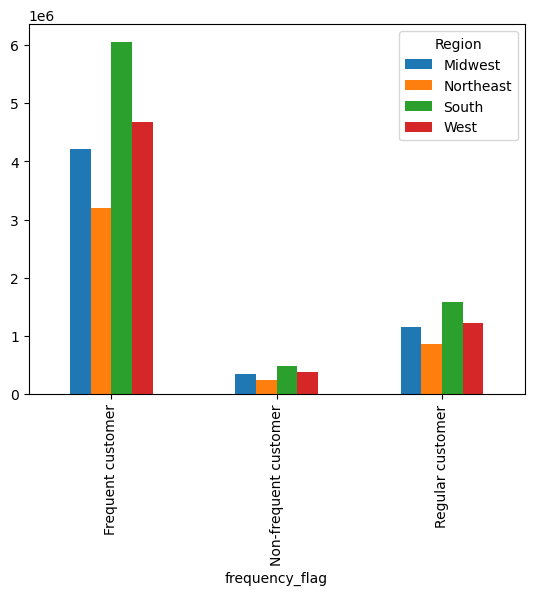

In [20]:
# create bar chart
bar_freq_reg =  crosstab_2.plot.bar()

In [21]:
# save bar chart
bar_freq_reg.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_freq_reg.png'))

In [22]:
#Create a crosstab 
crosstab_3 = pd.crosstab(df_merge['department'], df_merge['Region'], dropna=False)

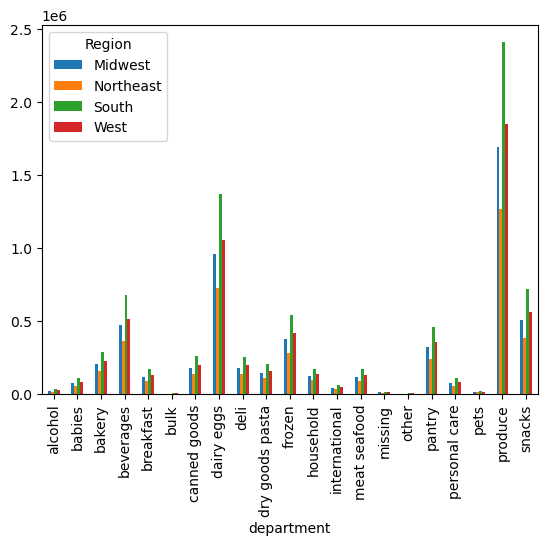

In [23]:
# create bar chart
bar_dep_reg =  crosstab_3.plot.bar()

In [24]:
# save bar chart
bar_dep_reg.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dep_reg.png'))

## Is there a connection between age and family status in terms of ordering habits?

In [30]:
#Create a crosstab 
crosstab_4 = pd.crosstab(df_merge['age-group'], df_merge['order_dow'], dropna=False)

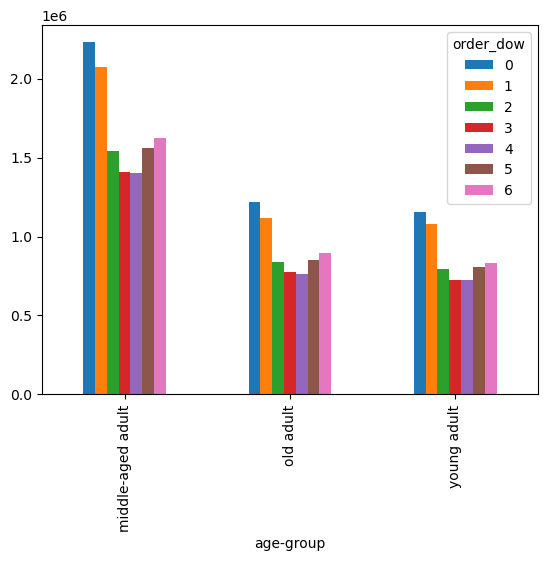

In [34]:
# create bar chart
bar_ageg_order =  crosstab_4.plot.bar()

In [35]:
# save bar chart
bar_ageg_order.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_ageg_order.png'))

In [36]:
#Create a crosstab 
crosstab_5 = pd.crosstab(df_merge['fam_status'], df_merge['order_dow'], dropna=False)

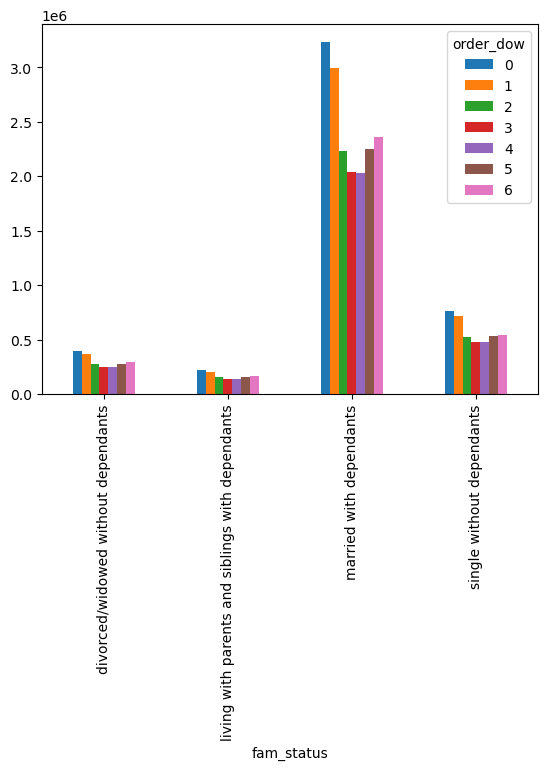

In [38]:
# create bar chart
bar_fam_order =  crosstab_5.plot.bar()


In [39]:
# save bar chart
bar_fam_order.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_fam_order.png'))

## What different classifications does the demographic information suggest?

C:\Users\Christian\AppData\Local\Temp\ipykernel_12144\549846683.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels(sc.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, 'beverages'),
 Text(1, 0, 'snacks'),
 Text(2, 0, 'produce'),
 Text(3, 0, 'breakfast'),
 Text(4, 0, 'dairy eggs'),
 Text(5, 0, 'household'),
 Text(6, 0, 'bakery'),
 Text(7, 0, 'dry goods pasta'),
 Text(8, 0, 'frozen'),
 Text(9, 0, 'pantry'),
 Text(10, 0, 'personal care'),
 Text(11, 0, 'meat seafood'),
 Text(12, 0, 'deli'),
 Text(13, 0, 'canned goods'),
 Text(14, 0, 'international'),
 Text(15, 0, 'alcohol'),
 Text(16, 0, 'missing'),
 Text(17, 0, 'pets'),
 Text(18, 0, 'babies'),
 Text(19, 0, 'other'),
 Text(20, 0, 'bulk')]

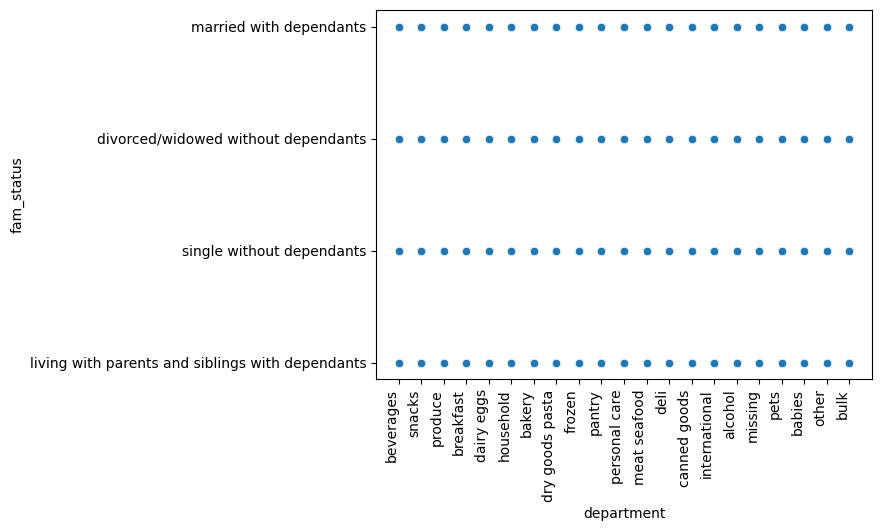

In [43]:
# create scatterplot
sc = sns.scatterplot(x= 'department',y= 'fam_status',data=df_merge)
sc.set_xticklabels(sc.get_xticklabels(), rotation=90, horizontalalignment='right')

In [44]:
# save scatteplot
sc.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_fam_department.png'))

## What differences can you find in ordering habits of different customer profiles?

In [57]:
#Create a crosstab 
crosstab_6 = pd.crosstab(df_merge['department'], df_merge['fam_status'], dropna=False)

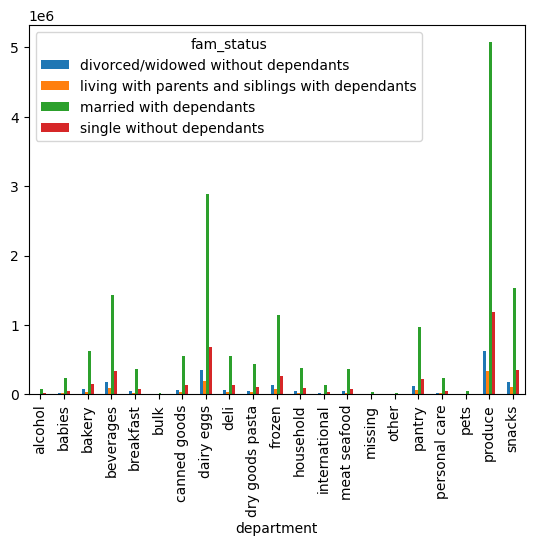

In [60]:
# create bar chart
bar_dep_fam =  crosstab_6.plot.bar()

In [61]:
# save bar chart
bar_dep_fam.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dep_fam.png'))

In [62]:
#Create a crosstab 
crosstab_7 = pd.crosstab(df_merge['department'], df_merge['age-group'], dropna=False)

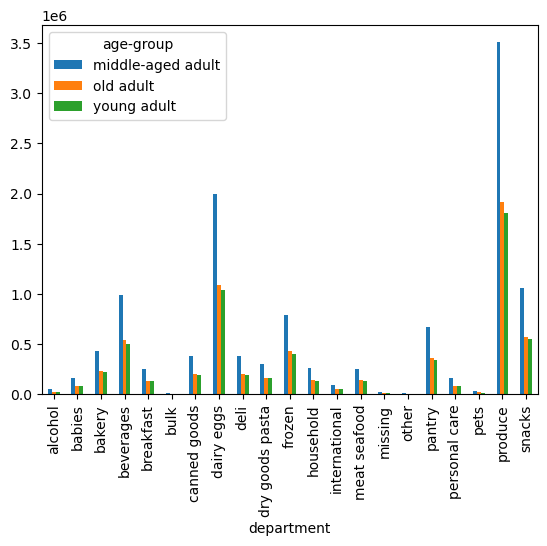

In [63]:
# create bar chart
bar_dep_age =  crosstab_7.plot.bar()

In [64]:
# save bar chart
bar_dep_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dep_age.png'))

In [69]:
#Create a crosstab 
crosstab_8 = pd.crosstab(df_merge['department'], df_merge['income-group'], dropna=False)

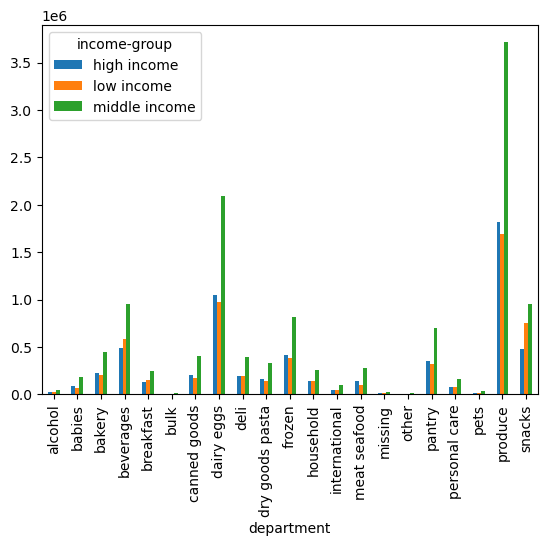

In [71]:
# create bar chart
bar_dep_income =  crosstab_8.plot.bar()

In [72]:
# save bar chart
bar_dep_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dep_income.png'))

In [74]:
#export as pickle
df_merge.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_final_merge.pkl'))